# Data visualization experiments

## Correlation matrix visualization

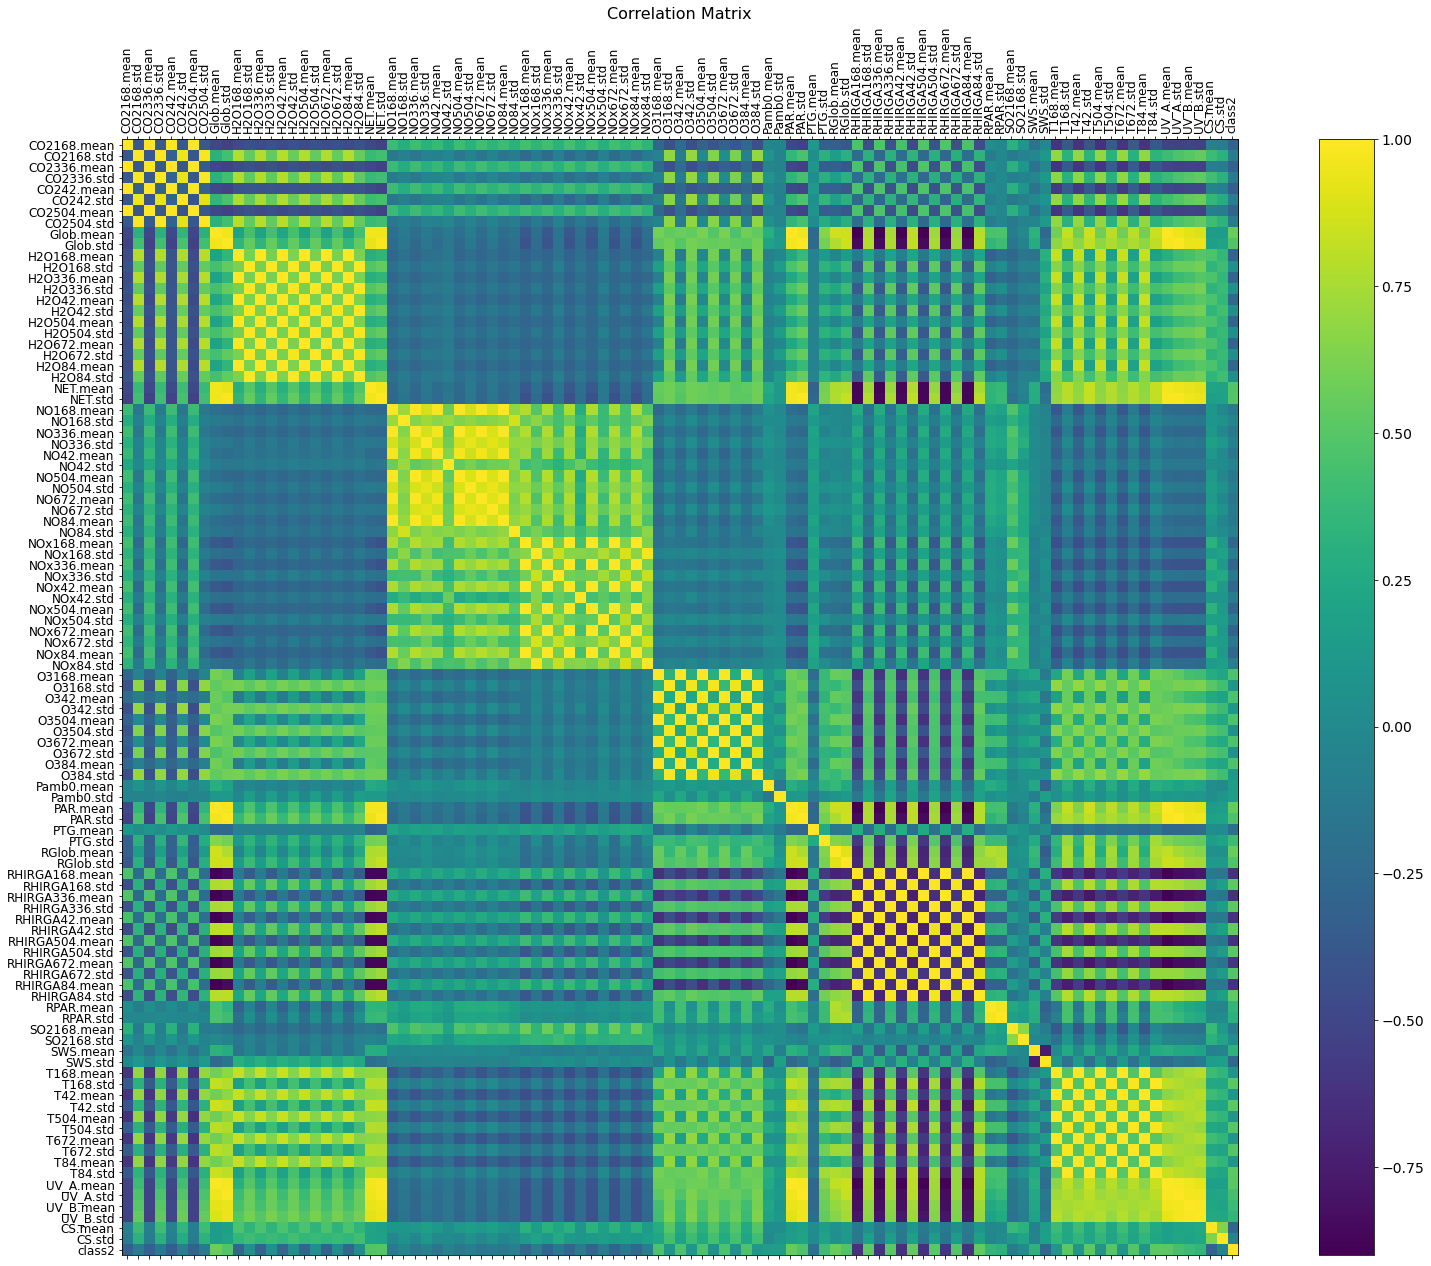

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

npf = pd.read_csv('../data/npf_train.csv')

npf = npf.set_index("date")
npf = npf.drop("id",axis=1)
npf = npf.drop("partlybad",axis=1)

# 0 is nonevent, 1 is event
class2 = np.array([0, 1])
npf["class2"] = class2[(npf["class4"]!="nonevent").astype(int)]

f = plt.figure(figsize=(29, 20))
plt.matshow(npf.corr(), fignum=f.number)
plt.xticks(range(npf.select_dtypes(['number']).shape[1]), npf.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(npf.select_dtypes(['number']).shape[1]), npf.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Visualize correlations for class2

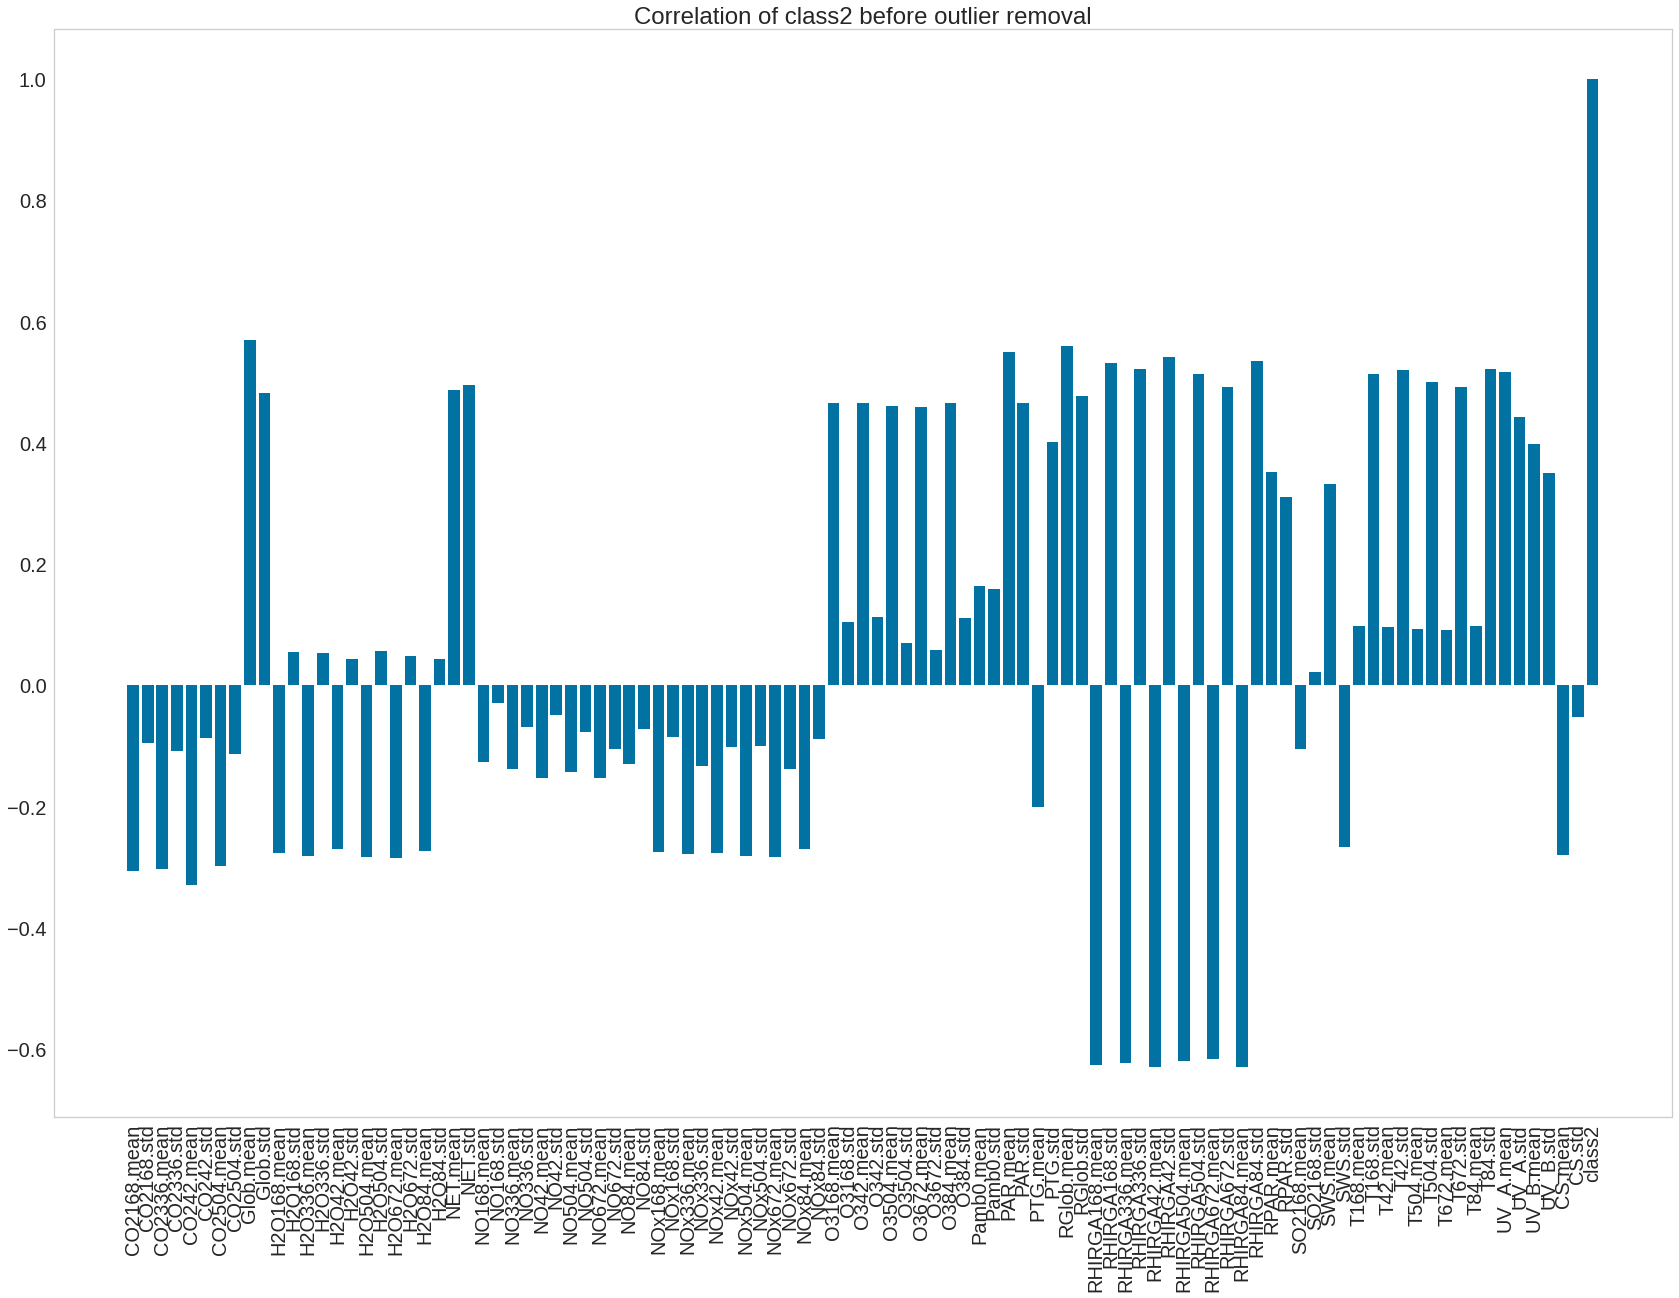

In [14]:
corr_class2 = npf.corr()["class2"]
# corr_class2

f = plt.figure(figsize=(29, 20))
plt.bar(corr_class2.index, corr_class2)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.title('Correlation of class2 before outlier removal', fontsize=24)
plt.grid(visible=None)
plt.savefig("corr-class2-before.png")

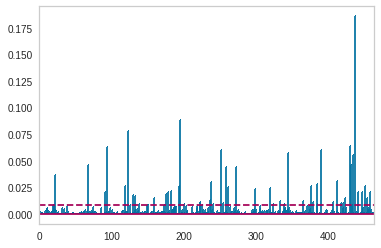

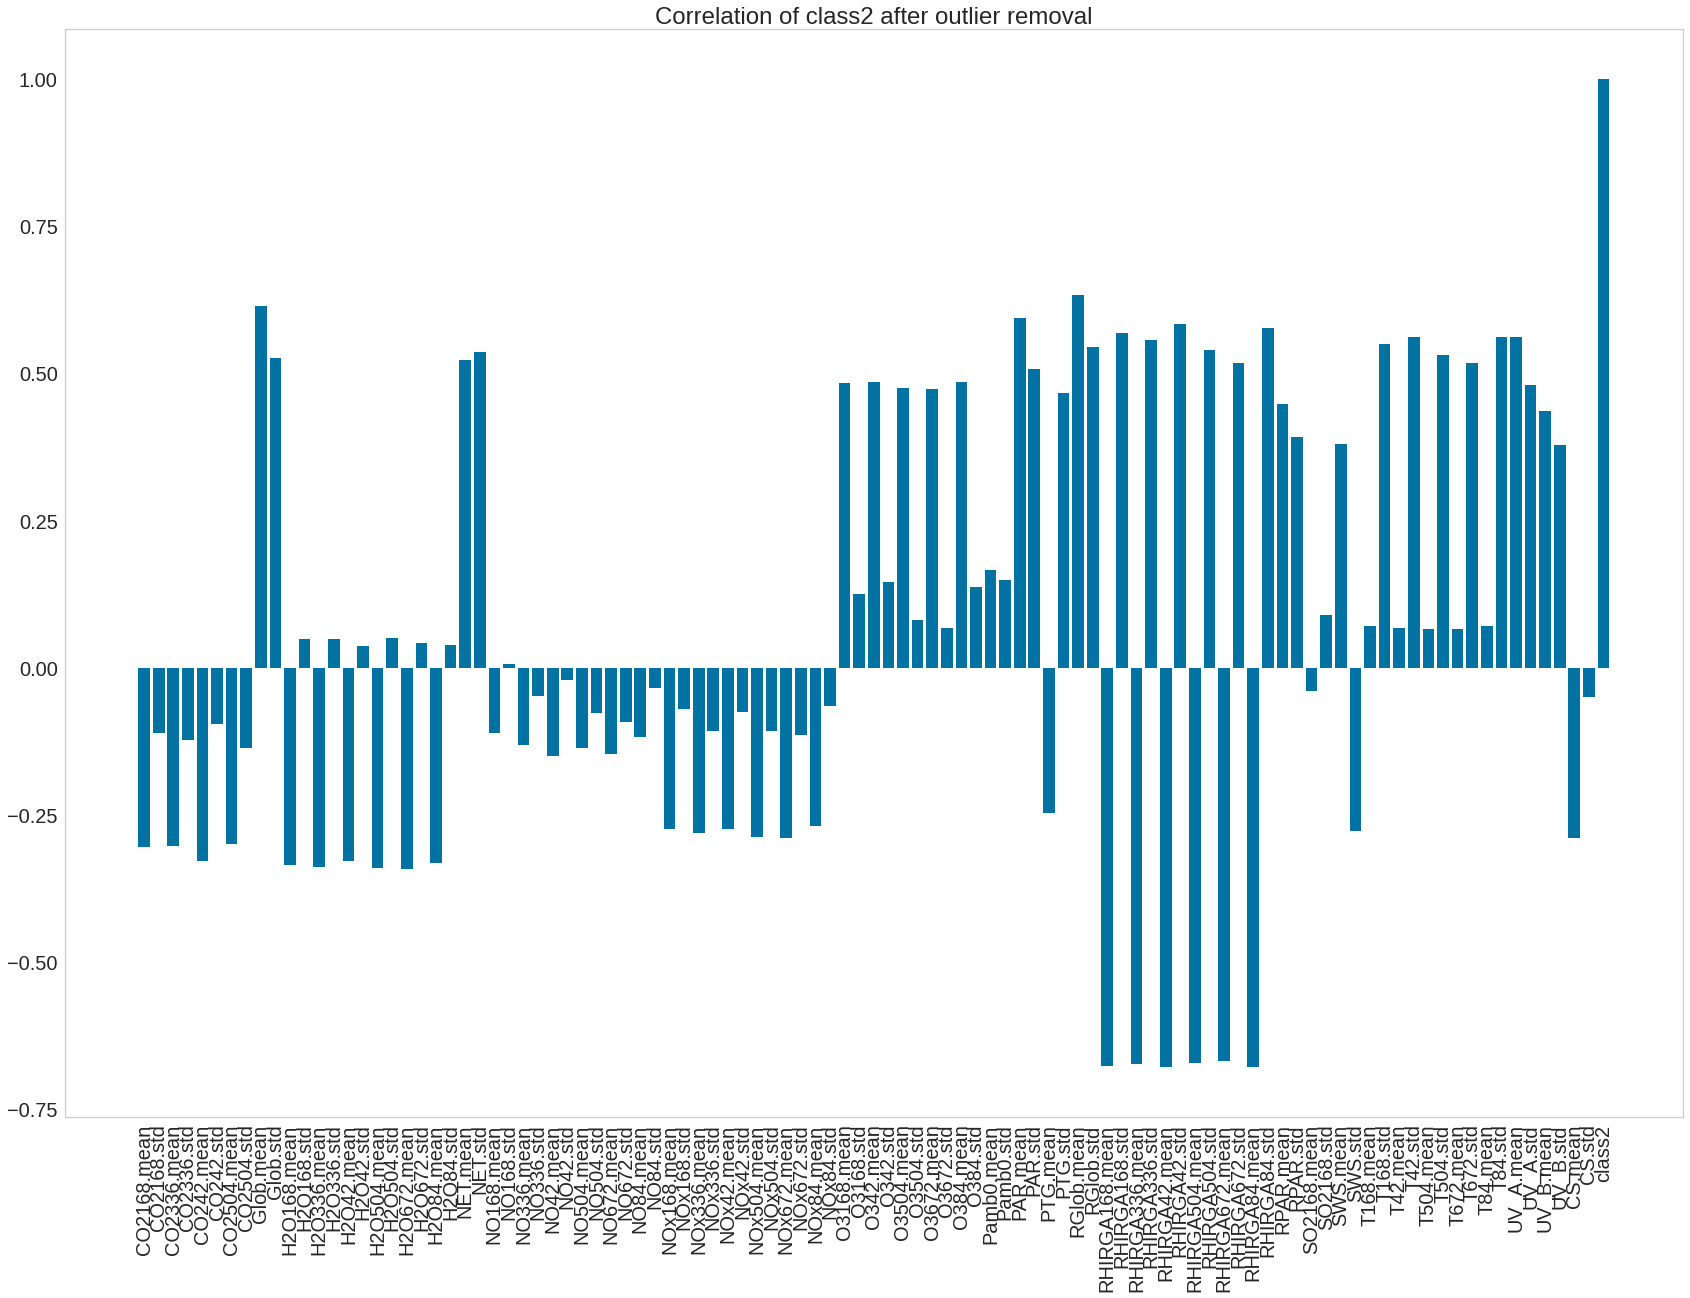

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.grid(visible=None)

npf = pd.read_csv('../data/npf_train.csv')

npf = npf.set_index("date")
npf = npf.drop("id",axis=1)
npf = npf.drop("partlybad",axis=1)

# 0 is nonevent, 1 is event
class2 = np.array([0, 1])
npf["class2"] = class2[(npf["class4"]!="nonevent").astype(int)]

X_train = npf.drop(["class2", "class4"], axis=1)
y_train = npf["class2"]

from yellowbrick.regressor import CooksDistance
    
# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X_train, y_train)

# Partial output from help(visualizer)
'''
 |  Attributes
 |  ----------
 |  distance_ : array, 1D
 |      The Cook's distance value for each instance specified in ``X``, e.g. an 1D array
 |      with shape ``(X.shape[0],)``.
 |  
 |  p_values_ : array, 1D
 |      The p values associated with the F-test of Cook's distance distribution. A 1D
 |      array whose shape matches ``distance_``.
 |  
 |  influence_threshold_ : float
 |      A rule of thumb influence threshold to determine outliers in the regression
 |      model, defined as It=4/n.
 |  
 |  outlier_percentage_ : float
 |      The percentage of instances whose Cook's distance is greater than the influnce
 |      threshold, the percentage is 0.0 <= p  <= 100.0.
 '''

visualizer.distance_ > visualizer.influence_threshold_

outlier_filter = visualizer.distance_ <= visualizer.influence_threshold_

X_train = X_train.loc[outlier_filter]
y_train = y_train[outlier_filter]

test_df = X_train.assign(class2=y_train)

corr_class2 = test_df.corr()["class2"]
# corr_class2

f = plt.figure(figsize=(29, 20))
plt.bar(corr_class2.index, corr_class2)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.title('Correlation of class2 after outlier removal', fontsize=24)
plt.grid(visible=None)
plt.savefig("corr-class2-removed.png")